# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Functions
Calculate euclidean distance between two points

In [2]:
def eucl_dist(A, B):
    squares = [(a - b)**2 for a, b in zip(A, B)]
    return(sum(squares)**0.5)

# KNN Algorithm in 2-D

## Generate Data

In [3]:
# number of groups
num_grps = 3

In [4]:
# minimum number of points per group
min_pts = 5

In [10]:
# maximum number of points per group
max_pts = 20

In [11]:
# generate random test and train data sets
train_xdict = {}
train_ydict = {}
test_xdict = {}
test_ydict = {}
for i in range(num_grps):
    size = np.random.randint(min_pts, max_pts+1)
    train_xdict[i] = np.random.randint(1, 11, size=2)[0] + np.random.normal(0, 1.5, size=size)
    train_ydict[i] = np.random.randint(1, 11, size=2)[0] + np.random.normal(0, 1.5, size=size)
    delete_list = []
    test_xvals = []
    test_yvals = []
    for j in range(int(size*0.2)):
        idx = np.random.randint(0, size)
        test_xvals.append(train_xdict[i][idx])
        test_yvals.append(train_ydict[i][idx])
        delete_list.append(idx)
    test_xdict[i] = test_xvals
    test_ydict[i] = test_yvals
    train_xdict[i] = np.delete(train_xdict[i], delete_list)
    train_ydict[i] = np.delete(train_ydict[i], delete_list)

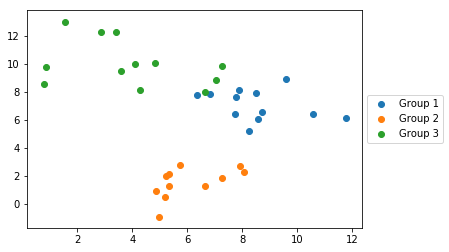

In [12]:
# plot training set
fig, ax = plt.subplots()
for i in range(num_grps):
    ax.scatter(train_xdict[i], train_ydict[i], label='Group ' + str(i+1))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

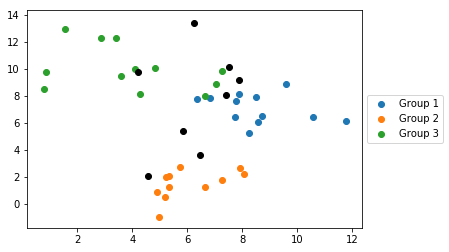

In [13]:
# plot test set with training set
fig, ax = plt.subplots()
for i in range(num_grps):
    ax.scatter(train_xdict[i], train_ydict[i], label='Group ' + str(i+1))
    ax.scatter(test_xdict[i], test_ydict[i], c='black')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

## Classify Test Set

## Generate Data Centroids

In [91]:
np.random.seed(0)
centroid_1 = np.random.randint(0, 100, size=2)
np.random.seed(5)
centroid_2 = np.random.randint(0, 100, size=2)
np.random.seed(2)
centroid_3 = np.random.randint(0, 100, size=2)
np.random.seed(3)
centroid_4 = np.random.randint(0, 100, size=2)

## Generate Training Set

In [92]:
grp_1_x = centroid_1[0] + np.random.normal(0, 5, size=5)
grp_1_y = centroid_1[1] + np.random.normal(0, 5, size=5)
grp_2_x = centroid_2[0] + np.random.normal(0, 5, size=6)
grp_2_y = centroid_2[1] + np.random.normal(0, 5, size=6)
grp_3_x = centroid_3[0] + np.random.normal(0, 5, size=7)
grp_3_y = centroid_3[1] + np.random.normal(0, 5, size=7)
grp_4_x = centroid_4[0] + np.random.normal(0, 5, size=10)
grp_4_y = centroid_4[1] + np.random.normal(0, 5, size=10)

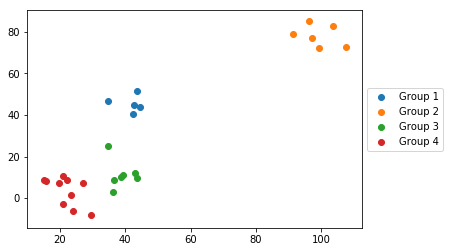

In [93]:
fig, ax = plt.subplots()
ax.scatter(grp_1_x, grp_1_y, label='Group 1')
ax.scatter(grp_2_x, grp_2_y, label='Group 2')
ax.scatter(grp_3_x, grp_3_y, label='Group 3')
ax.scatter(grp_4_x, grp_4_y, label='Group 4')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

## Generate Test Set

In [88]:
# number of test points per group
num_grp_1 = np.random.randint(1, 4)
num_grp_2 = np.random.randint(1, 4)
num_grp_3 = np.random.randint(1, 4)
num_grp_4 = np.random.randint(1, 4)

In [90]:
grp_1_x_test = centroid_1[0] + np.random.normal(0, 5, size=num_grp_1)
grp_1_y_test = centroid_1[1] + np.random.normal(0, 5, size=num_grp_1)
grp_2_x_test = centroid_2[0] + np.random.normal(0, 5, size=num_grp_2)
grp_2_y_test = centroid_2[1] + np.random.normal(0, 5, size=num_grp_2)
grp_3_x_test = centroid_3[0] + np.random.normal(0, 5, size=num_grp_3)
grp_3_y_test = centroid_3[1] + np.random.normal(0, 5, size=num_grp_3)
grp_4_x_test = centroid_4[0] + np.random.normal(0, 5, size=num_grp_4)
grp_4_y_test = centroid_4[1] + np.random.normal(0, 5, size=num_grp_4)

## Classify

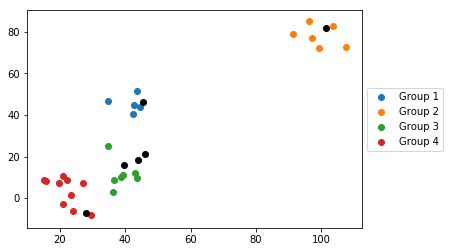

In [98]:
fig, ax = plt.subplots()
ax.scatter(grp_1_x, grp_1_y, label='Group 1')
ax.scatter(grp_2_x, grp_2_y, label='Group 2')
ax.scatter(grp_3_x, grp_3_y, label='Group 3')
ax.scatter(grp_4_x, grp_4_y, label='Group 4')
ax.scatter(grp_1_x_test, grp_1_y_test, c='black')
ax.scatter(grp_2_x_test, grp_2_y_test, c='black')
ax.scatter(grp_3_x_test, grp_3_y_test, c='black')
ax.scatter(grp_4_x_test, grp_4_y_test, c='black')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [ ]:
# assign number of nearest neighbors
n = 3

In [3]:
train_data = pd.read_csv('data/wookiee-train.csv', index_col=0)
test_data = pd.read_csv('data/wookiee-test.csv', index_col=0)
hold_data = pd.read_csv('data/wookiee-ho.csv', index_col=0)

In [4]:
train_data.head()

,wookieecolor,xcoord,ycoord,zcoord
0,red,-3.410692,0.854400,0.228154
1,red,0.350080,-0.751120,-1.845183
2,chartreuse,0.841712,-0.058204,0.246217
3,red,-0.646260,-1.821082,0.444616
4,blue,1.423538,2.269409,-1.061053


In [5]:
test_data.head()

,wookieecolor,xcoord,ycoord,zcoord
0,chartreuse,-0.500883,3.642656,-0.332794
1,blue,-0.697365,0.391459,0.913703
2,red,-0.653677,-1.676559,0.462973
3,white,-0.843060,0.856792,0.425849
4,red,-0.939812,0.182101,-1.452490


In [6]:
hold_data.head()

,xcoord,ycoord,zcoord
0,-0.420177,-0.403701,-1.367733
1,-1.552317,1.851824,-0.430991
2,-0.554652,0.138217,-0.185971
3,-0.431224,0.007767,0.899117
4,0.549926,-1.030384,0.799581


## Training Data

In [8]:
train_data['wookieecolor'].unique()

array(['red', 'chartreuse', 'blue', 'white'], dtype=object)

In [9]:
reds = train_data[train_data['wookieecolor'] == 'red'].iloc[:, 1:]
chartreuses = train_data[train_data['wookieecolor'] == 'chartreuse'].iloc[:, 1:]
blues = train_data[train_data['wookieecolor'] == 'blue'].iloc[:, 1:]
whites = train_data[train_data['wookieecolor'] == 'white'].iloc[:, 1:]

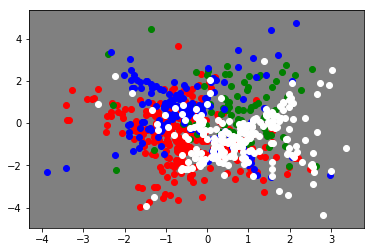

In [17]:
fig, ax = plt.subplots()
ax.set_facecolor('gray')
ax.scatter(reds.iloc[:,0], reds.iloc[:,1], c='r', label='red')
ax.scatter(chartreuses.iloc[:,0], chartreuses.iloc[:,1], c='g', label='chartreuse')
ax.scatter(blues.iloc[:,0], blues.iloc[:,1], c='blue', label='blue')
ax.scatter(whites.iloc[:,0], whites.iloc[:,1], c='white', label='white');

## Functions

In [16]:
# caclualate euclidean distance between two points

def euc_dist(coord1, coord2):
    
    diff_sqr = 0
    
    for i in range(len(coord1)):
        diff_sqr += (coord1[i] - coord2[i])**2
    
    distance = np.sqrt(diff_sqr)
    
    return(distance)

In [17]:
def knn_classify(X_train, y_train, coords, test_pts, k):
    
    test_labels = []
    
    for test_pt in test_pts.values:
        
        # initialize dataframe to store distance and labels of training observations
        knn_df = pd.DataFrame(columns=['distance', 'label'])
        # calculate distance to all training ovservations
        knn_df['distance'] = X_train.apply(lambda x: euc_dist(test_pt, x[coords]), axis=1)
        # input all training labels
        knn_df['label'] = y_train
        # sort dataframe by closest distance to training observations
        knn_df.sort_values(by='distance', inplace=True)
        # select most frequent label in k observations
        test_labels.append(knn_df.iloc[0:k, :]['label'].mode()[0])
    
    return(test_labels)

## Test Model

In [18]:
test_predicts = knn_classify(train_X, train_y, coords, test_X, 1)

In [19]:
sum(test_predicts == test_y) / len(test_y)

0.688

In [20]:
k_num = 5

In [ ]:
acc = []

for k in range(k_num):
    test_predicts = knn_classify(train_X, train_y, coords, test_X, k + 1)
    acc.append(sum(test_predicts == test_y) / len(test_y) * 100)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(range(k_num), acc)
ax.set_ylim(0, 100)
ax.set_ylabel('Accuracy')
ax.set_xlabel('k-value')

## Model Predictions

In [ ]:
test_predicts = knn_classify(train_X, train_y, coords, hold_data, 3)

In [ ]:
test_predicts